# FLIGHT PRICE PREDICTION ML MODEL

In [1]:
## importing some important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## storing/reading the train data set 
## view first 5 rows of the dataset

train_df = pd.read_excel('Flight_Prediction_Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
## shape/dimention of the dataset i.e no. of rows and cloumns in the dataset

train_df.shape

(10683, 11)

In [4]:
##information about the data set like column name, not null count and dtype

train_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# The describe() method returns description of the data in the DataFrame.

# If the DataFrame contains numerical data, the description contains these information for each column:

# count - The number of not-empty values.
# mean - The average (mean) value.
# std - The standard deviation.
# min - the minimum value.
# 25% - The 25% percentile*.
# 50% - The 50% percentile*.
# 75% - The 75% percentile*.
# max - the maximum value.

train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
# The function isnull().sum()
# returns the count of missing values in the data set. 
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Data Cleaning And Preprossesing

In [7]:
## dropna() function drops the nullvalues from the data set

train_df.dropna(inplace=True)

In [8]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### 1. Date_of_Journey, Dep_Time, Arrival_Time

In [9]:
## Defining a Function change_into_datetime() to convert the date-time related columns to standard date time format

def change_into_datetime(col):
    train_df[col]=pd.to_datetime(train_df[col])
    
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [10]:
## view first 5 rows of the dataset to check the new modification

train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-04-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-16 05:50:00,2022-04-16 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-16 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-04-16 18:05:00,2022-04-16 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-04-16 16:50:00,2022-04-16 21:35:00,4h 45m,1 stop,No info,13302


In [11]:
## Extracting the day and month from the Date_of_Journey column and adding it to new column named as 
## 'journey_day' and 'journey_month'

train_df['journey_day']=train_df['Date_of_Journey'].dt.day
train_df['journey_month']=train_df['Date_of_Journey'].dt.month

In [12]:
## view first 5 rows of the dataset to check the new modification

train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-04-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-16 05:50:00,2022-04-16 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-16 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-04-16 18:05:00,2022-04-16 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-04-16 16:50:00,2022-04-16 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [13]:
## view last 5 rows of the dataset to check the new modification using tail()

train_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2022-04-16 19:55:00,2022-04-16 22:25:00,2h 30m,non-stop,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2022-04-16 20:45:00,2022-04-16 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2022-04-16 08:20:00,2022-04-16 11:20:00,3h,non-stop,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2022-04-16 11:30:00,2022-04-16 14:10:00,2h 40m,non-stop,No info,12648,3,1
10682,Air India,2019-09-05,Delhi,Cochin,DEL → GOI → BOM → COK,2022-04-16 10:55:00,2022-04-16 19:15:00,8h 20m,2 stops,No info,11753,5,9


In [14]:
## The drop() function is used to drop specified labels from rows or columns.
## axis=1 is for columnwise deletion .
## inplace=True do operation inplace and return None. 

train_df.drop('Date_of_Journey', axis=1, inplace=True)

In [15]:
## view last 5 rows of the dataset to check the new modification using tail()

train_df.tail()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2022-04-16 19:55:00,2022-04-16 22:25:00,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,2022-04-16 20:45:00,2022-04-16 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2022-04-16 08:20:00,2022-04-16 11:20:00,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2022-04-16 11:30:00,2022-04-16 14:10:00,2h 40m,non-stop,No info,12648,3,1
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,2022-04-16 10:55:00,2022-04-16 19:15:00,8h 20m,2 stops,No info,11753,5,9


In [16]:
##information about the data set like column name, not null count and dtype

train_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Source           10682 non-null  object        
 2   Destination      10682 non-null  object        
 3   Route            10682 non-null  object        
 4   Dep_Time         10682 non-null  datetime64[ns]
 5   Arrival_Time     10682 non-null  datetime64[ns]
 6   Duration         10682 non-null  object        
 7   Total_Stops      10682 non-null  object        
 8   Additional_Info  10682 non-null  object        
 9   Price            10682 non-null  int64         
 10  journey_day      10682 non-null  int64         
 11  journey_month    10682 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 1.1+ MB


#### From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns

In [17]:
## function for extracting hour and minutes from differnt columns in the dataset
## using date-time library

def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute

## self defined function to drop the columns from the dataset
def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)
    
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

#extracting hour from Dep_Time
extract_hour(train_df,'Dep_Time')

#extracting minutes from Dep_Time
extract_min(train_df,'Dep_Time')

#extracting hour from Arrival_Time
extract_hour(train_df,'Arrival_Time')

#extracting min from Arrival_Time 
extract_min(train_df,'Arrival_Time')

#drop the column 
drop_col(train_df,'Arrival_Time')

#drop the column
drop_col(train_df,'Dep_Time')

In [18]:
## view First 5 rows of the dataset to check the new modification using tail()

train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


### 2. Duration
Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [19]:
duration=list(train_df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]
                
train_df['Duration']=duration

In [20]:
## view First 5 rows of the dataset to check the new modification using tail()

train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [21]:
## self defined functions to extract hours and minites from duration column

def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

train_df['dur_hour']=train_df['Duration'].apply(hour)
train_df['dur_min']=train_df['Duration'].apply(minutes)

In [22]:
## view First 5 rows of the dataset to check the new modification using tail()

train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [23]:
## drop column Duration

drop_col(train_df,'Duration')

In [24]:
##information about the data set like column name, not null count and dtype

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Route              10682 non-null  object
 4   Total_Stops        10682 non-null  object
 5   Additional_Info    10682 non-null  object
 6   Price              10682 non-null  int64 
 7   journey_day        10682 non-null  int64 
 8   journey_month      10682 non-null  int64 
 9   Dep_Time_hour      10682 non-null  int64 
 10  Dep_Time_min       10682 non-null  int64 
 11  Arrival_Time_hour  10682 non-null  int64 
 12  Arrival_Time_min   10682 non-null  int64 
 13  dur_hour           10682 non-null  object
 14  dur_min            10682 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [25]:
## astype(int) method returns a new DataFrame where the data types has been changed to the integer type.

train_df['dur_hour'] = train_df['dur_hour'].astype(int)
train_df['dur_min'] = train_df['dur_min'].astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Route              10682 non-null  object
 4   Total_Stops        10682 non-null  object
 5   Additional_Info    10682 non-null  object
 6   Price              10682 non-null  int64 
 7   journey_day        10682 non-null  int64 
 8   journey_month      10682 non-null  int64 
 9   Dep_Time_hour      10682 non-null  int64 
 10  Dep_Time_min       10682 non-null  int64 
 11  Arrival_Time_hour  10682 non-null  int64 
 12  Arrival_Time_min   10682 non-null  int64 
 13  dur_hour           10682 non-null  int32 
 14  dur_min            10682 non-null  int32 
dtypes: int32(2), int64(7), object(6)
memory usage: 1.2+ MB


In [26]:
## Categorical Columns in the dataset

categorical_data=[column for column in train_df.columns if train_df[column].dtype=='object']
categorical_data

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

## Handling categorical data

We are using two main Encoding Techniques to covert Categorical data into some numerical format

Nominal data -- Data that are not in any order -->one hot encoding¶

ordinal data -- Data are in order --> labelEncoder

### 3. Airline

In [27]:
##The value_counts() function is used to get a Series containing counts of unique values.

train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

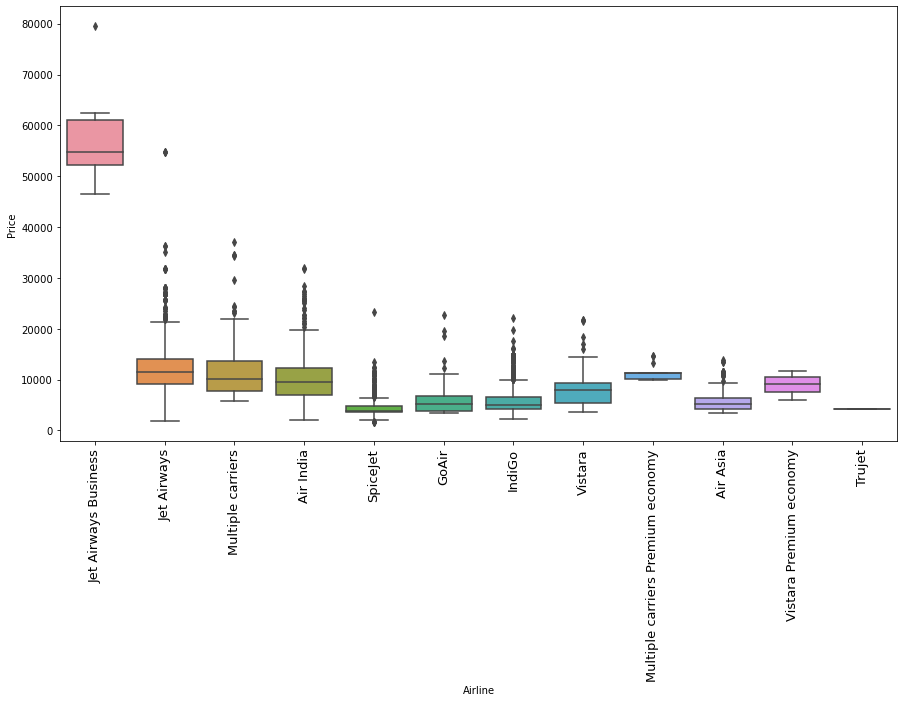

In [28]:
## Ploting a Boxplot for showing the relation between Airlines and their Prices

plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=train_df.sort_values('Price',ascending=False))
plt.xticks(rotation = 90, fontsize=13)

Text(0, 0.5, 'Price')

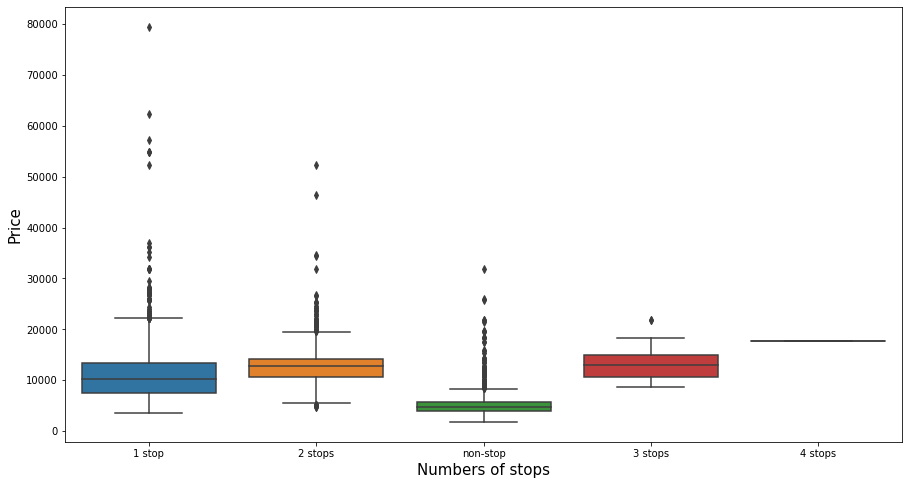

In [29]:
## Ploting a Boxplot for showing the relation between Total_stops and Prices variation according to it.

plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=train_df.sort_values('Price',ascending=False))
plt.xlabel('Numbers of stops',fontsize=15)
plt.ylabel('Price',fontsize=15)

In [30]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding using get_dummies function

Airline=pd.get_dummies(train_df['Airline'],drop_first=True)

In [31]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


### 4. Source

In [32]:
##The value_counts() function is used to get a Series containing counts of unique values.

train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

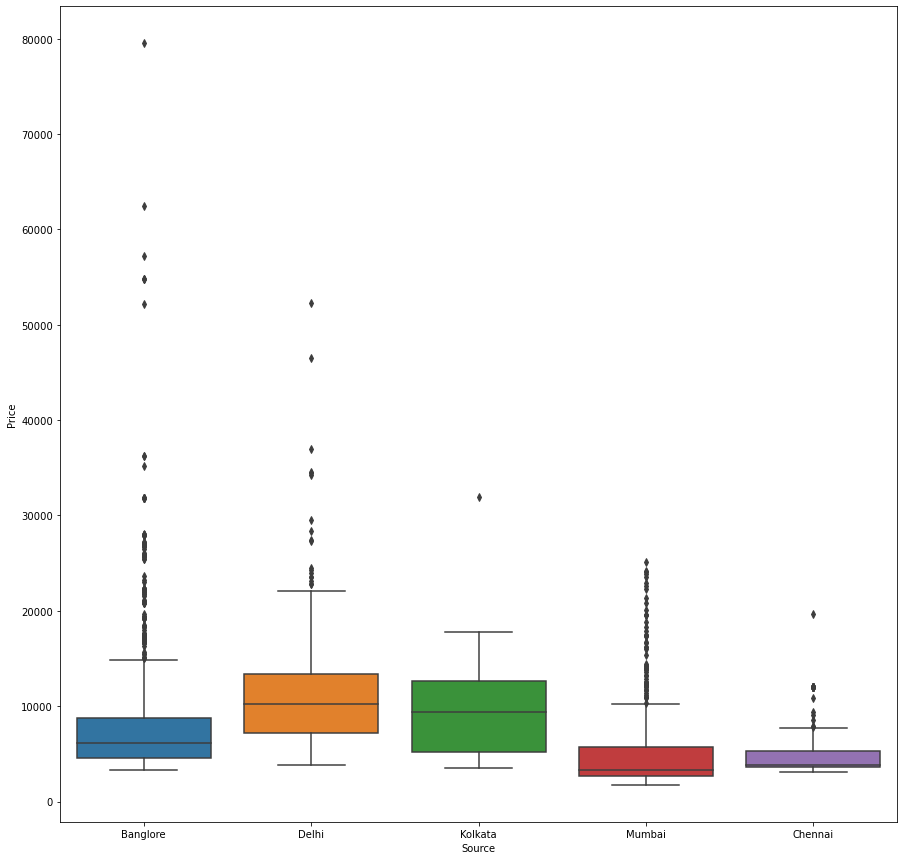

In [33]:
## Ploting a Boxplot for showing the relation between Source and their Prices

plt.figure(figsize=(15,15))
sns.boxplot(x='Source',y='Price',data=train_df.sort_values('Price',ascending=False))

In [34]:
# As Source is Nominal Categorical data we will perform OneHotEncoding using get_dummies function

source=pd.get_dummies(train_df['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### 5. Destination

In [35]:
##The value_counts() function is used to get a Series containing counts of unique values.

train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

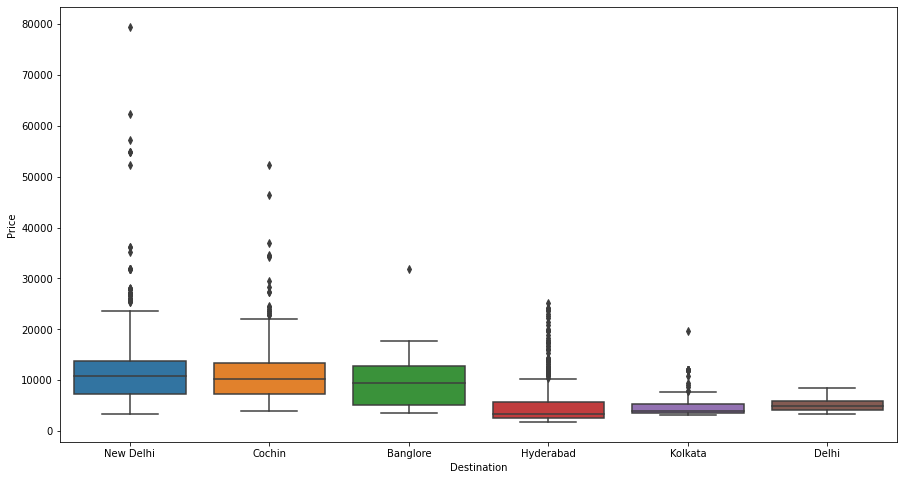

In [36]:
## Ploting a Boxplot for showing the relation between Destination and their Prices

plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=train_df.sort_values('Price',ascending=False))

In [37]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding using get_dummies function

destination=pd.get_dummies(train_df['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### 6. Route

In [38]:
##The value_counts() function is used to get a Series containing counts of unique values.

train_df['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXA → BLR                   1
BOM → JAI → DEL → HYD             1
BOM → DED → DEL → HYD             1
BOM → GOI → HYD                   1
BLR → HBX → BOM → BHO → DEL       1
Name: Route, Length: 128, dtype: int64

In [39]:
## Extracting Route1, Route2 ,Route3, Route4, Route5 from train_df['Route'] 

train_df['Route1']=train_df['Route'].str.split('→').str[0]
train_df['Route2']=train_df['Route'].str.split('→').str[1]
train_df['Route3']=train_df['Route'].str.split('→').str[2]
train_df['Route4']=train_df['Route'].str.split('→').str[3]
train_df['Route5']=train_df['Route'].str.split('→').str[4]

In [40]:
## view first 5 rows of the dataset to check the new modification

train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [41]:
## drop the column route

drop_col(train_df,'Route')

In [42]:
# The function isnull().sum()
# returns the count of missing values in the data set. 

train_df.isnull().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              0
Additional_Info          0
Price                    0
journey_day              0
journey_month            0
Dep_Time_hour            0
Dep_Time_min             0
Arrival_Time_hour        0
Arrival_Time_min         0
dur_hour                 0
dur_min                  0
Route1                   0
Route2                   0
Route3                3491
Route4                9116
Route5               10636
dtype: int64

In [43]:
##The value_counts() function is used to get a Series containing counts of unique values.

for i in train_df.columns:
    print('{} has total {} categories'.format(i,len(train_df[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Price has total 1870 categories
journey_day has total 9 categories
journey_month has total 7 categories
Dep_Time_hour has total 24 categories
Dep_Time_min has total 12 categories
Arrival_Time_hour has total 24 categories
Arrival_Time_min has total 12 categories
dur_hour has total 44 categories
dur_min has total 12 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 29 categories
Route4 has total 13 categories
Route5 has total 5 categories


As route2 3 and 4 has too many categories onehot encoding will be a bad choice. Therefore here we will be using Label Encoder 

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [45]:
## Applying Label Encoder to 'Route1', 'Route2', 'Route3', 'Route4' and 'Route5'.

for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    train_df[i]=encoder.fit_transform(train_df[i])

In [46]:
train_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,16,50,21,35,4,45,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,4,9,19,55,22,25,2,30,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,20,45,23,20,2,35,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,8,20,11,20,3,0,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,3,1,11,30,14,10,2,40,0,13,29,13,5


### 6. Total_Stop

In [47]:
## Mapping Total_Stops data to numerical values

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
train_df['Total_Stops']=train_df['Total_Stops'].map(dict)

In [48]:
## droping the unwanted columns/ preprosessed columns

drop_col(train_df,'Source')
drop_col(train_df,'Destination')
drop_col(train_df,'Airline')

In [49]:
train_df.head()

,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5
0,0,No info,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,2,No info,7662,5,1,5,50,13,15,7,25,2,25,1,3,5
2,2,No info,13882,6,9,9,25,4,25,19,0,3,32,4,5,5
3,1,No info,6218,5,12,18,5,23,30,5,25,2,34,3,13,5
4,1,No info,13302,3,1,16,50,21,35,4,45,0,34,8,13,5


In [50]:
##information about the data set like column name, not null count and dtype

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Total_Stops        10682 non-null  int64 
 1   Additional_Info    10682 non-null  object
 2   Price              10682 non-null  int64 
 3   journey_day        10682 non-null  int64 
 4   journey_month      10682 non-null  int64 
 5   Dep_Time_hour      10682 non-null  int64 
 6   Dep_Time_min       10682 non-null  int64 
 7   Arrival_Time_hour  10682 non-null  int64 
 8   Arrival_Time_min   10682 non-null  int64 
 9   dur_hour           10682 non-null  int32 
 10  dur_min            10682 non-null  int32 
 11  Route1             10682 non-null  int32 
 12  Route2             10682 non-null  int32 
 13  Route3             10682 non-null  int32 
 14  Route4             10682 non-null  int32 
 15  Route5             10682 non-null  int32 
dtypes: int32(7), int64(8), object(1)
memory 

In [51]:
## shape/dimention of the dataset i.e no. of rows and cloumns in the dataset

train_df.shape

(10682, 16)

In [52]:
## concatinating/merging the preprocessed columns to train_df and naming the new data set as final_df

final_df = pd.concat([Airline,source,destination, train_df], axis=1)

In [53]:
## shape/dimention of the dataset i.e no. of rows and cloumns in the dataset

final_df.shape

(10682, 36)

In [54]:
## to display all the 35 columns 
pd.set_option('display.max_columns',35)
final_df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,...,New Delhi,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,No info,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,2,No info,7662,5,1,5,50,13,15,7,25,2,25,1,3,5
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,2,No info,13882,6,9,9,25,4,25,19,0,3,32,4,5,5
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,No info,6218,5,12,18,5,23,30,5,25,2,34,3,13,5
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,No info,13302,3,1,16,50,21,35,4,45,0,34,8,13,5


In [55]:
## drop the column Addition Info from the dataset

final_df.drop('Additional_Info', axis=1,inplace=True)

In [56]:
##information about the data set like column name, not null count and dtype

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Air India                          10682 non-null  uint8
 1   GoAir                              10682 non-null  uint8
 2   IndiGo                             10682 non-null  uint8
 3   Jet Airways                        10682 non-null  uint8
 4   Jet Airways Business               10682 non-null  uint8
 5   Multiple carriers                  10682 non-null  uint8
 6   Multiple carriers Premium economy  10682 non-null  uint8
 7   SpiceJet                           10682 non-null  uint8
 8   Trujet                             10682 non-null  uint8
 9   Vistara                            10682 non-null  uint8
 10  Vistara Premium economy            10682 non-null  uint8
 11  Chennai                            10682 non-null  uint8
 12  Delhi             

## Checking and handeling outliers

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


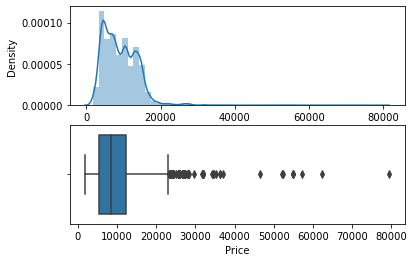

In [57]:
## plotting a distribution plot and a box plot of price column from the dataset
## for the visualization of outliers

def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)
    
plot(final_df,'Price')

As there is some outliers in price feature,so we replace it with median.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


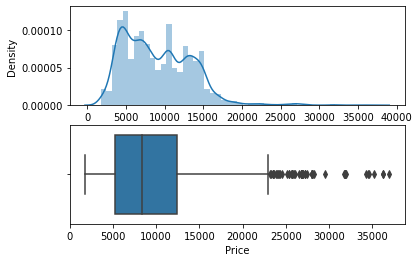

In [58]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])
plot(final_df,'Price')

In [59]:
X=final_df.drop('Price',axis=1)
y=train_df['Price']

## Feature Selection
It is about finding the best feature and having good relation with independent variable
Issue of dimensionality reduction reduces.

##### For this we use mutual_info_classif

In [60]:
from sklearn.feature_selection import mutual_info_classif

In [61]:
mutual_info_classif(X,y)

array([0.76647018, 0.09096584, 0.67668427, 0.92440726, 0.00633694,
       0.5773504 , 0.020989  , 0.3331695 , 0.        , 0.229047  ,
       0.        , 0.17211831, 1.58337009, 0.88650872, 0.29206492,
       1.5532979 , 0.40820623, 0.29464158, 0.18344185, 0.39195599,
       2.14742276, 1.07066051, 0.86510742, 1.41656804, 1.21081883,
       1.84989822, 1.50035795, 1.74781097, 1.09864197, 2.06355442,
       2.80949277, 2.26150093, 1.44555761, 0.74291116])

In [62]:
## important features and their impact socre in the pridiction value

imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Air India,0.763859
GoAir,0.108412
IndiGo,0.690138
Jet Airways,0.915237
Jet Airways Business,0.000000
Multiple carriers,0.583650
Multiple carriers Premium economy,0.015739
SpiceJet,0.320046
Trujet,0.000000
Vistara,0.233297


In [63]:
## important features and their impact socre in the pridiction value
## in decending order

imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.792558
Route3,2.308668
Total_Stops,2.170852
Route1,2.045076
Arrival_Time_hour,1.828981
dur_hour,1.793213
Arrival_Time_min,1.560110
Cochin,1.550606
Delhi,1.548475
Route4,1.489724


As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

# Model Training

In [64]:
# spiliting the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [65]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
    
    

In [66]:
## importing different Regression techniques/Algorithms to check the model performance

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

In [67]:
## Support Vector Machine

predict(SVR())

Model is: SVR()
Training score: 0.036808067930953814
Predictions are: [8527.74272429 8268.96331405 8459.17514562 ... 8292.53786893 8453.81861376
 8538.60587913]


r2 score is: 0.05252926427324878
MAE:3327.7462262427184
MSE:18244190.9793285
RMSE:4271.321924103649


In [68]:
## Logistic regression

predict(LogisticRegression())

Model is: LogisticRegression()
Training score: 0.3356348741954359
Predictions are: [14571 15237 10844 ...  4226  7408 10262]


r2 score is: 0.44215816344012093
MAE:1873.8647636874123
MSE:10741622.531118391
RMSE:3277.4414611276266


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
## Naive Bayes
predict(GaussianNB())

Model is: GaussianNB()
Training score: 0.46331187829139847
Predictions are: [ 8996 18550 14781 ...  4226  5894 10577]


r2 score is: 0.5640672430754468
MAE:1590.6775854000937
MSE:8394180.602714086
RMSE:2897.2712338878605


In [69]:
## K- nearest Neighbors regressor

predict(KNeighborsRegressor())

Model is: KNeighborsRegressor()
Training score: 0.746380546942052
Predictions are: [10401.2 16362.4 12933.2 ...  4210.   9073.  11232.4]


r2 score is: 0.6544658783016435
MAE:1700.4507253158633
MSE:6653493.631445953
RMSE:2579.436688784191


In [70]:
## Gradient Boosting Regressor

predict(GradientBoostingRegressor())

Model is: GradientBoostingRegressor()
Training score: 0.8004872305794601
Predictions are: [ 5702.86974497 17826.76035345 12133.74946613 ...  4547.37535805
  6959.32889786 11428.58468176]


r2 score is: 0.8168057886010294
MAE:1397.4579865718079
MSE:3527528.664520348
RMSE:1878.1716280788473


In [71]:
## Random Forest Regressor

predict(RandomForestRegressor())

Model is: RandomForestRegressor()
Training score: 0.9512644198828824
Predictions are: [ 8483.55       17036.21       13560.67333333 ...  3869.96
  5529.75       10888.791     ]


r2 score is: 0.8401911647625848
MAE:1086.9070350417403
MSE:3077227.401666464
RMSE:1754.2027823676667


In [72]:
## Decision Tree Regressor
predict(DecisionTreeRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9701124435927416
Predictions are: [ 8996. 17024. 14571. ...  3943.  5054. 10262.]


r2 score is: 0.7541180976715707
MAE:1254.7292934019654
MSE:4734622.627684188
RMSE:2175.918800802132
